In [1]:
import numpy as np
import pandas as pd

In [14]:

try:
    df = pd.read_csv("election_data.csv")
except FileNotFoundError:
    data = {
    'State': ['Madhya Pradesh', 'Madhya Pradesh', 'Madhya Pradesh', 'Madhya Pradesh',
              'Rajasthan', 'Rajasthan', 'Rajasthan', 'Rajasthan'],
    'Party': ['BJP', 'INC', 'BSP', 'Others',
              'BJP', 'INC', 'BSP', 'Others'],
    'Seats_Won': [163, 66, 0, 1, 115, 69, 2, 13],
    'Total_Seats': [230, 230, 230, 230, 200, 200, 200, 200],
    'Voter_Turnout (%)': [72.1, 72.1, 72.1, 72.1, 74.2, 74.2, 74.2, 74.2]
    }

    df = pd.DataFrame(data)
    df.to_csv("election_data.csv", index = False)
    print("file has been created")

    

In [15]:
df

,State,Party,Seats_Won,Total_Seats,Voter_Turnout (%)
0,Madhya Pradesh,BJP,163,230,72.1
1,Madhya Pradesh,INC,66,230,72.1
2,Madhya Pradesh,BSP,0,230,72.1
3,Madhya Pradesh,Others,1,230,72.1
4,Rajasthan,BJP,115,200,74.2
5,Rajasthan,INC,69,200,74.2
6,Rajasthan,BSP,2,200,74.2
7,Rajasthan,Others,13,200,74.2


In [53]:
df['seat_won in %'] = (df['Seats_Won']/df['Total_Seats']*100).round(3)

In [54]:
df

,State,Party,Seats_Won,Total_Seats,Voter_Turnout (%),seat_won in %
0,Madhya Pradesh,BJP,163,230,72.1,70.870
1,Madhya Pradesh,INC,66,230,72.1,28.696
2,Madhya Pradesh,BSP,0,230,72.1,0.000
3,Madhya Pradesh,Others,1,230,72.1,0.435
4,Rajasthan,BJP,115,200,74.2,57.500
5,Rajasthan,INC,69,200,74.2,34.500
6,Rajasthan,BSP,2,200,74.2,1.000
7,Rajasthan,Others,13,200,74.2,6.500


In [37]:
idx = df.groupby('State')['Seats_Won'].idxmax()
result = df.loc[idx, ['State', 'Party', 'Seats_Won']]
for i, row in result.iterrows():
    print(f"Max seat won in {row['State']} is {row['Seats_Won']} by {row['Party']}")


Max seat won in Madhya Pradesh is 163 by BJP
Max seat won in Rajasthan is 115 by BJP


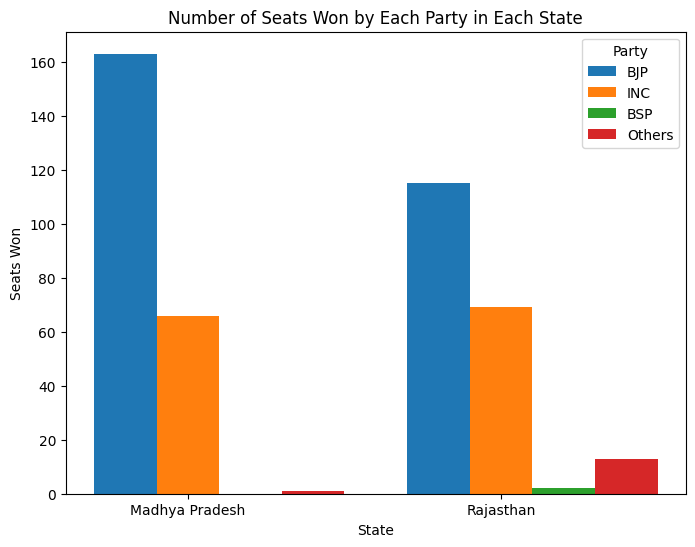

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))

state = df['State'].unique()
parties = df['Party'].unique()

bar_width = 0.2
positions = list(range(len(state)))

party_offsets = {
    party: i * bar_width for i, party in enumerate(parties)
}

# Plot bars for each party
for party in parties:
    party_data = df[df['Party'] == party]
    ax.bar(
        [p + party_offsets[party] for p in positions],
        party_data['Seats_Won'],
        bar_width,
        label=party
    )

# Adding labels and title
ax.set_xlabel('State')
ax.set_ylabel('Seats Won')
ax.set_title('Number of Seats Won by Each Party in Each State')
ax.set_xticks([p + bar_width for p in positions])
ax.set_xticklabels(state)
ax.legend(title='Party')

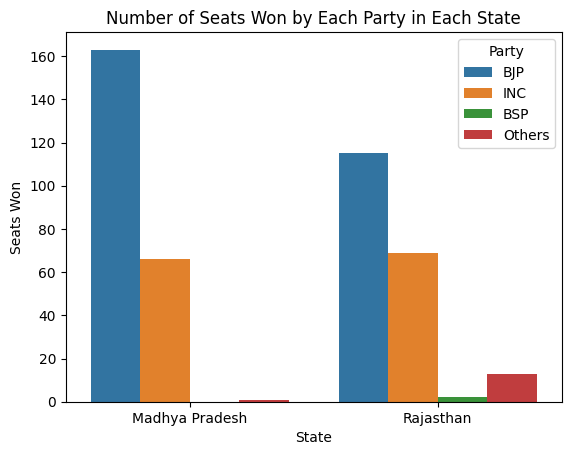

In [45]:
import seaborn as sns
sns.barplot(df , x = "State" , y = "Seats_Won", hue = "Party")
plt.title('Number of Seats Won by Each Party in Each State')
plt.xlabel('State')
plt.ylabel('Seats Won')
plt.legend(title='Party')